Nama: Bani Adam Tampubolon

NIM: 121140187

Tugas: Handson-3

In [2]:
# prompt: connect to drive in this path My Drive/multimedia/nafas.mp4'

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/multimedia/nafas.mp4'
# Now you can use file_path with other libraries
# For example, to check if the file exists
import os
if os.path.exists(file_path):
  print(f"File exists at: {file_path}")
else:
  print(f"File not found at: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File exists at: /content/drive/My Drive/multimedia/nafas.mp4


Membuat Video dari Gambar

In [3]:
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import datetime as dt

Input Video yang akan digunakan

In [4]:
# prompt: Definisikan lokasi direktori dari gambar yang akan dijadikan video.

image_dir = '/content/drive/My Drive/multimedia/nafas.mp4' # Replace with your image directory

# Check if the directory exists
if os.path.exists(image_dir):
  print(f"Image directory exists at: {image_dir}")
else:
  print(f"Image directory not found at: {image_dir}")
  # You might want to create the directory here if it doesn't exist:
  # os.makedirs(image_dir, exist_ok=True)

Image directory exists at: /content/drive/My Drive/multimedia/nafas.mp4


Lima path pertama

In [5]:
if os.path.isdir(image_dir): # Check if image_dir is a directory
  list_imgs = sorted(glob(os.path.join(image_dir, '*')))
  list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))
  for i in range(min(5, len(list_imgs))): # Print the first 5 paths (or fewer if there are less than 5 files)
      print(list_imgs[i])
elif os.path.isfile(image_dir) and image_dir.lower().endswith(('.mp4', '.avi', '.mov')): # Check if image_dir is a video file
  print(f"Video file path: {image_dir}")
  # You'll need to use cv2.VideoCapture to access the frames.
  vidcap = cv2.VideoCapture(image_dir)
  success, image = vidcap.read()
  count = 0
  while success and count < 5:
    print(f"Frame {count} path is not a separate file but a frame of the video")
    success, image = vidcap.read()
    count += 1
else:
  print("Invalid image directory or file path.")

Video file path: /content/drive/My Drive/multimedia/nafas.mp4
Frame 0 path is not a separate file but a frame of the video
Frame 1 path is not a separate file but a frame of the video
Frame 2 path is not a separate file but a frame of the video
Frame 3 path is not a separate file but a frame of the video
Frame 4 path is not a separate file but a frame of the video


Total gambar pada video

In [6]:
if os.path.isdir(image_dir):
    total_images = len(glob(os.path.join(image_dir, '*')))
    print(f"Total number of images: {total_images}")
elif os.path.isfile(image_dir) and image_dir.lower().endswith(('.mp4', '.avi', '.mov')):
    vidcap = cv2.VideoCapture(image_dir)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the video: {total_frames}")
else:
    print("Invalid image directory or file path.")

Total number of frames in the video: 1814


Pertanyaan 1

Jelaskan maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))`

Jawab:
- Kode ini biasanya digunakan untuk memastikan file yang memiliki nama berurutan berdasarkan angka diurutkan dengan benar, terutama saat bekerja dengan data gambar, file log, atau dataset lainnya yang dinamai berdasarkan angka.

Mengubah image menjadi bentuk array

In [7]:
images_array = [] # Inisialisasi sebagai list kosong

if os.path.isfile(image_dir) and image_dir.lower().endswith(('.mp4', '.avi', '.mov')):
    vidcap = cv2.VideoCapture(image_dir)
    fps = vidcap.get(cv2.CAP_PROP_FPS) # Dapatkan frame rate video
    total_frames_to_read = int(fps * 20) # Hitung total frame untuk 20 detik

    success, image = vidcap.read()
    frame_count = 0
    while success and frame_count < total_frames_to_read:
        images_array.append(image) # Tambahkan setiap frame ke list
        success, image = vidcap.read()
        frame_count += 1

    # Ubah list frame menjadi array NumPy
    images_array = np.array(images_array)


In [8]:
print(f"Shape of images_array: {images_array.shape}")

Shape of images_array: (591, 1080, 1920, 3)


Membuat sebuah video dari image sequence yang telah kita muat ke dalam `images_array.`

In [9]:
# Sekarang Anda dapat melanjutkan dengan kode penulisan video Anda
save_loc = os.path.join(os.getcwd(), 'data', 'adam-rgb.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Periksa apakah images_array tidak kosong sebelum mengakses elemennya
if images_array.size > 0:
    height, width, layers = images_array[0].shape
    video = cv2.VideoWriter(save_loc, fourcc, fps, (width, height)) # Gunakan fps asli video

    for image in images_array:
        video.write(image)

    video.release()
else:
    print("Tidak ada frame yang diekstrak dari video. images_array kosong.")

Pertanyaan 2

Jelaskan tentang bagian kode berikut:

`fourcc = cv2.VideoWriter_fourcc(*'mp4v')`

Apakah ada opsi lain selain mp4v? Jika ada, coba gunakan dan jelaskan.

Jawab:
1. digunakan untuk menentukan codec video yang akan digunakan saat menyimpan video dengan OpenCV. Fungsi cv2.`VideoWriter_fourcc()` menghasilkan kode FourCC (Four Character Code) yang menunjukkan format atau codec video yang akan digunakan.

2. Opsi Codec Lain:
Ya, ada beberapa opsi codec lain yang dapat Anda gunakan selain 'mp4v'. Berikut beberapa contoh dan penjelasannya:

  - 'XVID': Codec ini sering digunakan untuk file AVI. Ini umumnya memberikan kompresi yang baik dan kompatibilitas yang luas.

  - 'MJPG': Ini adalah codec Motion JPEG. Ini memberikan kualitas yang baik tetapi dapat menghasilkan file yang lebih besar dibandingkan dengan codec lain.

  - 'DIVX': Ini adalah codec lain yang populer untuk file AVI. Ini dikenal dengan kualitas dan kompresi yang baik.

  - 'H264': Ini adalah codec yang efisien dan banyak digunakan untuk file MP4. Ini memberikan kompresi yang sangat baik dan kualitas yang tinggi. Namun, mungkin memerlukan lebih banyak daya pemrosesan untuk encoding.

Menyimpan 100 frame pada video menjadi gambar,

In [10]:
# prompt: Setelah anda berhasil membuat video dari image sequence, sekarang kita akan mencoba menyimpan setiap frame pada video menjadi gambar. dan simpan 100 frame pertama

import cv2
import os

# Ganti dengan path video Anda
video_path = '/content/drive/My Drive/multimedia/nafas.mp4'
output_dir = '/content/drive/My Drive/multimedia/frames'  # Direktori untuk menyimpan frame

# Buat direktori jika belum ada
os.makedirs(output_dir, exist_ok=True)

vidcap = cv2.VideoCapture(video_path)
success, image = vidcap.read()
count = 0

while success and count < 100:
    frame_filename = os.path.join(output_dir, f"frame_{count:04d}.jpg") # Nama file frame dengan padding nol
    cv2.imwrite(frame_filename, image)     # simpan frame
    success, image = vidcap.read()
    print(f'Read a new frame: {success}, Frame number: {count}, Saved as: {frame_filename}')
    count += 1

vidcap.release()
print("Selesai menyimpan frame.")

Read a new frame: True, Frame number: 0, Saved as: /content/drive/My Drive/multimedia/frames/frame_0000.jpg
Read a new frame: True, Frame number: 1, Saved as: /content/drive/My Drive/multimedia/frames/frame_0001.jpg
Read a new frame: True, Frame number: 2, Saved as: /content/drive/My Drive/multimedia/frames/frame_0002.jpg
Read a new frame: True, Frame number: 3, Saved as: /content/drive/My Drive/multimedia/frames/frame_0003.jpg
Read a new frame: True, Frame number: 4, Saved as: /content/drive/My Drive/multimedia/frames/frame_0004.jpg
Read a new frame: True, Frame number: 5, Saved as: /content/drive/My Drive/multimedia/frames/frame_0005.jpg
Read a new frame: True, Frame number: 6, Saved as: /content/drive/My Drive/multimedia/frames/frame_0006.jpg
Read a new frame: True, Frame number: 7, Saved as: /content/drive/My Drive/multimedia/frames/frame_0007.jpg
Read a new frame: True, Frame number: 8, Saved as: /content/drive/My Drive/multimedia/frames/frame_0008.jpg
Read a new frame: True, Fram

Pertanyaan/Tugas nomor 3

**Membuat video dengan FPS yang lebih rendah.**


- Dengan menggunakan video, simpanlah frame gambar setiap 3 frame. Begini ilustrasinya, jika ada frame 1 s/d 30, maka anda hanya perlu menyimpan frame 1, 4, 7, 10, 13, 16, 19, 22, 25, 28.

- Dengan analogi ini, artinya anda mengurangi FPS-nya. Berapakah FPS yang baru?

- Untuk setiap gambar, convertlah ke dalam format grayscale dan resize menjadi 1280 x 720.

- Untuk setiap gambar, berikanlah titik merah (ukuran bebas, namun terlihat ketika video diputar). Titik tersebut bergerak dari kiri ke kanan untuk setiap frame. Titik tersebut harus sampai di ujung kanan gambar pada frame terakhir. Anda harus melakukan ini secara manual dengan memanipulasi matriks (tidak boleh pakai fungsi / library yang sudah ada)

- Ingat, karena ini titik merah, maka channel warna pada video anda haruslah RGB (walaupun gambarnya telah menjadi grayscale).

- Save video tersebut dengan nama video_low_fps.mp4

In [11]:
import cv2
import os
import numpy as np

images_array = []  # Initialize as a list

if os.path.isfile(image_dir) and image_dir.lower().endswith(('.mp4', '.avi', '.mov')):
    vidcap = cv2.VideoCapture(image_dir)
    fps_original = vidcap.get(cv2.CAP_PROP_FPS)

    success, image = vidcap.read()
    frame_count = 0
    while success:
        if frame_count % 3 == 0:  # Simpan frame setiap 3 frame
            # Konversi ke grayscale
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Resize ke 1280x720
            image_resized = cv2.resize(image_gray, (1280, 720))

            # Ubah ke RGB untuk menambahkan titik merah
            image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2BGR)

            # Tambahkan titik merah yang bergerak
            # Jika array kosong, hindari pembagian dengan nol
            x_pos = int(frame_count / 3 * (1280 / (len(images_array) if len(images_array)>0 else 1)))

            # Gambar titik merah secara manual
            if 0 <= x_pos < 1280 and 0 <= 360 < 720:
                image_rgb[360, x_pos, 0] = 0  # Channel Biru
                image_rgb[360, x_pos, 1] = 0  # Channel Hijau
                image_rgb[360, x_pos, 2] = 255 # Channel Merah

            images_array.append(image_rgb) # Append to the list

        success, image = vidcap.read()
        frame_count += 1

    # Ubah list frame menjadi array NumPy after processing
    images_array = np.array(images_array)

In [13]:
# FPS baru
fps_new = fps_original / 3

# Simpan video
save_loc = '/content/drive/My Drive/multimedia/video_low_fps.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
if images_array.size > 0:
    height, width, layers = images_array[0].shape
    video = cv2.VideoWriter(save_loc, fourcc, fps_new, (width, height))

    for image in images_array:
        video.write(image)

    video.release()
else:
    print("Tidak ada frame yang diekstrak dari video. images_array kosong.")

print(f"FPS baru: {fps_new}")

FPS baru: 9.85646009274708


Penjelasan Jawaban nomor 3

- Video memiliki FPS (Frame per Second) sebanyak 10 FPS
- Resolusi Video berubah menjadi 1280 x 720
- Video telah berubah menjadi grayscale
- Challange Titik merah pada video gagal dilakukan pada percobaan
- Video berhasil disimpan dengan nama video_low_fps.mp4 pada Link dibawah,
https://drive.google.com/file/d/11xXUcAIRgU714YCtGVFvwzLYEZoMSYlY/view?usp=sharing

Deteksi wajah dengan dlib

In [14]:
import cv2
import numpy as np

# Path ke file video Anda
video_path = '/content/drive/My Drive/multimedia/nafas.mp4'

# Inisialisasi VideoCapture
cap = cv2.VideoCapture(video_path)

# Periksa apakah video berhasil dibuka
if not cap.isOpened():
    print("Error opening video file")
    exit()



Mengubah video ke dalam numpy.array

In [15]:
# Dapatkan FPS video
fps = cap.get(cv2.CAP_PROP_FPS)

# Hitung total frame untuk 20 detik
total_frames_to_read = int(fps * 20)

frames = []
frame_count = 0
while(cap.isOpened() and frame_count < total_frames_to_read):
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
        frame_count += 1
    else:
        break

# Ubah list frame menjadi NumPy array
frames_array = np.array(frames)

# Tutup video
cap.release()

In [16]:
print(frames_array.shape)

(591, 1080, 1920, 3)


Ambil satu gambar sebagai contoh

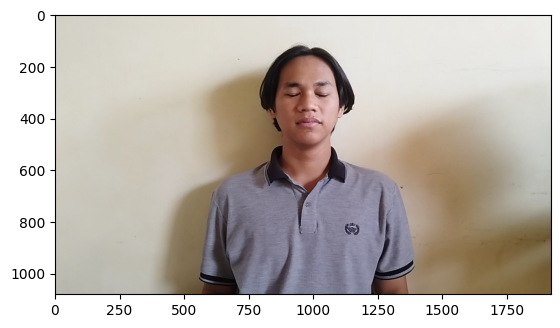

In [17]:
# prompt: ambilah salah satu gambar sebagai contoh
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Choose a random index within the valid range
images_array = frames_array

import random
if images_array.size > 0:
  random_index = random.randint(0, len(images_array) - 1)

  # Access the randomly selected image
  random_image = images_array[random_index]

  # Now you can work with 'random_image'
  plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)) # Display the image (optional)
  plt.show()
else:
    print("Tidak ada frame yang diekstrak dari video. images_array kosong.")

Test detector pada dlib apakah dapat mengenali wajah

In [18]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib
random_image = images_array[random_index]
faces = detector(random_image)

print(f"Jumlah wajah yang terdeteksi: {len(faces)}")


Jumlah wajah yang terdeteksi: 1


Melakukan deteksi wajah menggunakan bounding box dlib, dengan mengambil salah satu frame sacara acak pada video

x,y,w,h: (825, 231, 268, 268)
x,y_edit,w,h_edit: (825, 115, 268, 402)


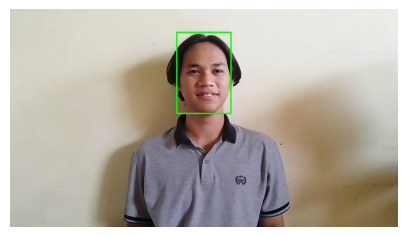

In [50]:
import dlib
import cv2
import matplotlib.pyplot as plt

# ... (Your other code) ...

single_img = frames_array[1].copy()

# Convert single_img to RGB before face detection
single_img_rgb = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)

faces = detector(single_img_rgb, 1)  # Use the RGB image for detection

for i, face in enumerate(faces):
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    print(f"x,y,w,h: {x, y, w, h}")

    y_edit = int(y - (0.5 * y))
    h_edit = int(h + (0.5 * h))
    print(f"x,y_edit,w,h_edit: {x, y_edit, w, h_edit}")

    # Draw rectangle on the original BGR image (single_img)
    cv2.rectangle(single_img, (x, y_edit), (x + w, y_edit + h_edit), (0, 255, 0), 5)

# Display the original BGR image with bounding box
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)) # Convert to RGB for display
plt.axis('off')
plt.show()

Pertanyaan/Tugas 4

Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.


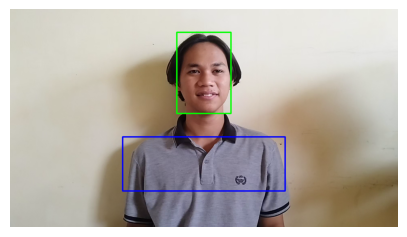

In [51]:
# prompt: Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.

# ... (Your existing code) ...

# Assuming 'faces' contains the detected face bounding boxes from dlib
for i, face in enumerate(faces):
    x, y, w, h = face.left(), face.top(), face.width(), face.height()

    # Adjust the ROI to include the shoulder and chest area
    # These values are estimates and may need to be adjusted based on your video
    shoulder_chest_y = int(y + h * 1.5)  # Extend downwards from the bottom of the face
    shoulder_chest_h = int(h * 1.0)       # Adjust the height to cover the shoulder and chest
    shoulder_chest_x = int(x - w * 1.0)   # Adjust left to include shoulders
    shoulder_chest_w = int(w * 2.5)      # Adjust width to include shoulders

    # Ensure coordinates are within image bounds
    shoulder_chest_y = max(0, shoulder_chest_y)
    shoulder_chest_h = min(single_img.shape[0] - shoulder_chest_y, shoulder_chest_h)
    shoulder_chest_x = max(0, shoulder_chest_x)
    shoulder_chest_w = min(single_img.shape[1] - shoulder_chest_x, shoulder_chest_w)

    # Draw a rectangle for the adjusted ROI
    cv2.rectangle(single_img, (shoulder_chest_x, shoulder_chest_y), (shoulder_chest_x + shoulder_chest_w, shoulder_chest_y + shoulder_chest_h), (255, 0, 0), 5)

# Display the image with the adjusted ROI
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Pertanyaan/Tugas 5

- Dengan menggunakan video anda, lakukan facial tracking pada detik ke 25 - 40.

- Berikan bounding box pada wajah yang terdeteksi. Simpan video tersebut di google drive, link-nya cantumkan pada jawaban anda.

- Lakukan strategi terbaik untuk mengatur ROI agar wajah tetap terdeteksi pada setiap frame.

- Anda dapat menyesuaikan waktu deteksi (berapa detik sekali deteksi dengan dlib dilakukan)

- Anda dapat menyesuaikan parameter deteksi wajah dengan dlib dan parameter tracking dengan OpenCV

In [ ]:
import os
import cv2
import dlib
import numpy as np
import datetime as dt

# Path ke video Anda
VID_PATH = "/content/drive/MyDrive/multimedia/nafas.mp4"  # Ganti dengan path video Anda
OUTPUT_PATH = "/content/drive/MyDrive/multimedia/nafas-roi-tracking.mp4"

# Inisialisasi deteksi wajah
detector = dlib.get_frontal_face_detector()

# Inisialisasi video
cap = cv2.VideoCapture(VID_PATH)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))

# Variabel untuk pelacakan
face_detected = False
p0 = None  # Titik awal untuk pelacakan
lk_params = dict(winSize=(50, 50), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Waktu deteksi ulang
detection_interval = fps * 3  # Deteksi ulang setiap 3 detik
detection_countdown = detection_interval

# Frame rentang waktu 25-40 detik
start_frame = 25 * fps
end_frame = 40 * fps
frame_count = 0

# Catat waktu mulai
start_time = dt.datetime.now()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_count += 1

    # Hanya proses frame dalam rentang waktu 25-40 detik
    if frame_count < start_frame:
        continue
    elif frame_count > end_frame:
        break

    if frame_count == start_frame or detection_countdown == 0:  # Deteksi pertama atau deteksi ulang
        faces = detector(gray, 1)
        if faces:
            # Ambil wajah pertama
            face = faces[0]
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Inisialisasi titik pelacakan
            face_roi = gray[y:y + h, x:x + w]
            p0 = cv2.goodFeaturesToTrack(face_roi, mask=None, maxCorners=10, qualityLevel=0.8, minDistance=10, blockSize=10)
            if p0 is not None:
                p0[:, :, 0] += x
                p0[:, :, 1] += y

            face_detected = True
            detection_countdown = detection_interval  # Reset countdown
    else:  # Pelacakan wajah pada frame berikutnya
        if face_detected and p0 is not None:
            # Lakukan pelacakan optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, **lk_params)
            if p1 is not None and st is not None:
                good_new = p1[st == 1]
                good_old = p0[st == 1]

                # Hitung pergeseran menggunakan median untuk menghindari outlier
                if len(good_new) > 0:
                    x_shift = np.median(good_new[:, 0] - good_old[:, 0])
                    y_shift = np.median(good_new[:, 1] - good_old[:, 1])

                    x = int(x + x_shift)
                    y = int(y + y_shift)

                    # Pastikan bounding box tetap dalam batas frame
                    x = max(0, min(x, frame_width - w))
                    y = max(0, min(y, frame_height - h))

                    # Gambar bounding box pada wajah
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

                # Perbarui titik pelacakan
                p0 = good_new.reshape(-1, 1, 2)

    # Simpan frame ke video output
    out.write(frame)

    # Perbarui frame sebelumnya untuk pelacakan optical flow
    prev_gray = gray.copy()

    # Hitung mundur untuk deteksi ulang
    detection_countdown -= 1

cap.release()
out.release()

print(f"Proses selesai. Video output disimpan di: {OUTPUT_PATH}")
print(f"Waktu yang diperlukan: {dt.datetime.now() - start_time}")


Proses selesai. Video output disimpan di: /content/drive/MyDrive/multimedia/nafas-roi-tracking.mp4
Waktu yang diperlukan: 0:00:53.628308


Link video hasil nafas-roi-tracking.mp4

https://drive.google.com/file/d/18jRwjDGCYTw19IBKD7Oven5ZeinMZdmz/view?usp=sharing

Pertanyaan/Tugas 6

- Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)

- Modifikasi kode di atas agar lebih smooth Tips: - Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame - Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)

In [ ]:
import os
import cv2
import dlib
import numpy as np

# Path ke video Anda
VID_PATH = "/content/drive/MyDrive/multimedia/nafas.mp4"  # Ganti dengan path video Anda
OUTPUT_PATH = "/content/drive/MyDrive/multimedia/nafas-clown-2.mp4"
OVERLAY_IMG_PATH = "/content/drive/MyDrive/multimedia/clown-nose.png"  # Gambar yang akan ditempel

# Inisialisasi deteksi wajah dan landmark
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/multimedia/shape_predictor_68_face_landmarks.dat")

# Inisialisasi video
cap = cv2.VideoCapture(VID_PATH)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Video hanya diproses dari detik 1 hingga 10
start_frame = fps * 1  # Detik 1
end_frame = fps * 10  # Detik 10

# Output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))

# Load gambar overlay
overlay_img = cv2.imread(OVERLAY_IMG_PATH, cv2.IMREAD_UNCHANGED)

# Check if the image was loaded successfully
if overlay_img is None:
    print(f"Error: Could not load overlay image from {OVERLAY_IMG_PATH}")
    # Handle the error, e.g., exit the script or use a default image
    exit()

# Pastikan overlay memiliki kanal alpha
if overlay_img.shape[2] != 4:  # Jika tidak memiliki 4 kanal
    b, g, r = cv2.split(overlay_img)
    alpha = np.ones(b.shape, dtype=b.dtype) * 255  # Kanal alpha penuh
    overlay_img = cv2.merge((b, g, r, alpha))
# Fungsi untuk menambahkan overlay
def add_overlay(frame, overlay, x, y, w, h):
    overlay_resized = cv2.resize(overlay, (w, h))
    for c in range(0, 3):  # Untuk setiap channel warna (BGR)
        frame[y:y+h, x:x+w, c] = overlay_resized[:, :, c] * (overlay_resized[:, :, 3] / 255.0) + \
                                 frame[y:y+h, x:x+w, c] * (1.0 - overlay_resized[:, :, 3] / 255.0)
    return frame

# Variabel untuk pelacakan
frame_count = 0
landmarks_detected = None
detection_interval = 30  # Deteksi landmark setiap 30 frame

# Mulai dari frame ke-1
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count + start_frame > end_frame:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_count += 1

    # Deteksi landmark setiap beberapa frame
    if frame_count % detection_interval == 0 or landmarks_detected is None:
        faces = detector(gray)
        if faces:
            # Ambil wajah pertama yang terdeteksi
            face = faces[0]
            landmarks = predictor(gray, face)

            # Ambil titik landmark tertentu (contoh: 33 untuk ujung hidung)
            x, y = landmarks.part(33).x, landmarks.part(33).y
            w, h = 50, 50  # Ukuran overlay
            landmarks_detected = (x, y, w, h)

    # Jika landmark telah terdeteksi, tempelkan overlay
    if landmarks_detected:
        x, y, w, h = landmarks_detected
        # Pastikan overlay berada dalam batas frame
        x, y = max(0, x - w // 2), max(0, y - h // 2)  # Pusatkan overlay
        w = min(w, frame_width - x)
        h = min(h, frame_height - y)
        frame = add_overlay(frame, overlay_img, x, y, w, h)

    # Simpan frame ke video output
    out.write(frame)

cap.release()
out.release()

print(f"Proses selesai. Video output disimpan di: {OUTPUT_PATH}")


Proses selesai. Video output disimpan di: /content/drive/MyDrive/multimedia/nafas-clown-2.mp4


Link video nafas-clown-2.mp4

https://drive.google.com/file/d/1-4v3w4XbAkLkRciPYYhDPuHHkUa5U12E/view?usp=sharing

Catatan untuk dosen:
- Karena proses terkadang memakan memori yang besar, beberapa tugas yang sekiranya memerlukan komputasi yang besar, saya terpaksa harus mengurangi komputasi, pengurangan komputasi seperti memangkas durasi pengerjaan pada video, dan hal lainnya yang dapat mengurangi kinerja mesin terutama memori.

- Dalam pengerjaan tugas Handson 3 ini saya dibantu oleh AI, seperti Chat GPT, Gemini, dan lain-lain.